In [208]:
import pandas as pd


df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [209]:
df.groupby('year').lifeExp.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [210]:
years = df.year.unique()
print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [211]:
y1952 = df.loc[df.year == 1952, :]
y1952.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053


In [212]:
y1952_mean = y1952.lifeExp.mean()
print(y1952_mean)

49.057619718309866


In [213]:
df.groupby(['year', 'continent']).lifeExp.mean()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [214]:
continent_describe = df.groupby('continent').lifeExp.describe()
print(continent_describe)

           count       mean        std     min       25%      50%       75%  \
continent                                                                     
Africa     624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas   300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia       396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe     360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania     24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

              max  
continent          
Africa     76.442  
Americas   80.653  
Asia       82.603  
Europe     81.757  
Oceania    81.235  


In [215]:
def my_mean(values):
    """
    计算平均值
    """
    # 获得数值个数，用做分母
    n = len(values)
    # 从0开始求和
    sum = 0
    # 把每个值加入和
    for value in values:
        # 用总和除以总个数，得到平均值并返回
        sum += value
    return sum / n


agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)
agg_my_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [216]:
def my_mean_diff(values, diff_value):
    """
    计算平均值和diff_value之差
    """
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum / n
    return mean - diff_value


global_mean = df.lifeExp.mean()
print(global_mean)

59.474439366197174


In [217]:
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff, diff_value=global_mean)
agg_mean_diff

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [218]:
import numpy as np


gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
gdf

,count_nonzero,mean,std
year,,,
1952,142,49.057620,12.225956
1957,142,51.507401,12.231286
1962,142,53.609249,12.097245
1967,142,55.678290,11.718858
1972,142,57.647386,11.381953
1977,142,59.570157,11.227229
1982,142,61.533197,10.770618
1987,142,63.212613,10.556285
1992,142,64.160338,11.227380


In [219]:
gdf_dict = df.groupby('year').agg({
    'lifeExp': 'mean',
    'pop': 'median',
    'gdpPercap': 'median'
})
gdf_dict

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334740
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


In [220]:
gdf = df.groupby('year')['lifeExp'].agg([np.count_nonzero, np.mean, np.std]).rename(
    columns={'count_nonzero': 'count',
             'mean': 'avg',
             'std': 'std_dev'}
).reset_index()
gdf

,year,count,avg,std_dev
0,1952,142,49.057620,12.225956
1,1957,142,51.507401,12.231286
2,1962,142,53.609249,12.097245
3,1967,142,55.678290,11.718858
4,1972,142,57.647386,11.381953
5,1977,142,59.570157,11.227229
6,1982,142,61.533197,10.770618
7,1987,142,63.212613,10.556285
8,1992,142,64.160338,11.227380
9,1997,142,65.014676,11.559439


In [221]:
def my_zscore(x):
    '''
    计算给定数据的z分数是一个向量或值序列
    '''
    return (x - x.mean()) / x.std()


transform_z = df.groupby('year').lifeExp.transform(my_zscore)
df.shape

(1704, 6)

In [222]:
transform_z.shape

(1704,)

In [223]:
transform_z.head()

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64

In [224]:
from scipy.stats import zscore


sp_z_grouped = df.groupby('year').lifeExp.transform(zscore)
sp_z_grouped

0      -1.662719
1      -1.737377
2      -1.792867
3      -1.854699
4      -1.900878
          ...   
1699   -0.081910
1700   -0.338167
1701   -1.580537
1702   -2.100756
1703   -1.955077
Name: lifeExp, Length: 1704, dtype: float64

In [225]:
sp_z_nogroup = zscore(df.lifeExp)
sp_z_nogroup[:5]

0   -2.375334
1   -2.256774
2   -2.127837
3   -1.971178
4   -1.811033
Name: lifeExp, dtype: float64

In [226]:
import seaborn as sns


np.random.seed(42)
tips_10 = sns.load_dataset('tips').sample(10)

tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [227]:
count_sex = tips_10.groupby('sex').count()
count_sex

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,4,7,7,7,7,7
Female,2,3,3,3,3,3


In [228]:
def fill_na_mean(x):
    '''
    返回给定向量的平均值
    '''
    avg = x.mean()
    return x.fillna(avg)


total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)
tips_10['fill_total_bill'] = total_bill_group_mean
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300
176,NaN,2.00,Male,Yes,Sun,Dinner,2,17.9525
192,28.44,2.56,Male,Yes,Thur,Lunch,2,28.4400
124,12.48,2.52,Female,No,Thur,Lunch,2,12.4800
9,14.78,3.23,Male,No,Sun,Dinner,2,14.7800
101,15.38,3.00,Female,Yes,Fri,Dinner,2,15.3800


In [229]:
tips_10[['sex', 'total_bill', 'fill_total_bill']]

,sex,total_bill,fill_total_bill
24,Male,19.82,19.8200
6,Male,8.77,8.7700
153,Male,NaN,17.9525
211,Male,NaN,17.9525
198,Female,NaN,13.9300
176,Male,NaN,17.9525
192,Male,28.44,28.4400
124,Female,12.48,12.4800
9,Male,14.78,14.7800
101,Female,15.38,15.3800


In [230]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [231]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [232]:
tips_filtered = tips.groupby('size').filter(lambda x: x['size'].count() >= 30)
tips_filtered.shape

(231, 7)

In [233]:
tips_filtered['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

In [234]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [235]:
grouped = tips_10.groupby('sex')
grouped

In [236]:
grouped.groups

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}

In [237]:
avgs = grouped.mean(numeric_only=True)
avgs

,total_bill,tip,size
sex,,,
Male,20.02,2.875714,2.571429
Female,13.62,2.506667,2.000000


In [238]:
tips_10.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [239]:
female = grouped.get_group('Female')
female

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [240]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [241]:
for sex_group in grouped:
    print(f'the type is {type(sex_group)}\n')
    print(f'the length is {len(sex_group)}\n')
    first_element = sex_group[0]
    print(f'the first element is {first_element}\n')
    print(f'it has a type of {type(first_element)}\n')
    second_element = sex_group[1]
    print(f'the second element is {second_element}\n')
    print(f'it has a type of {type(second_element)}\n')
    print('What we have:')
    print(sex_group)

the type is <class 'tuple'>

the length is 2

the first element is Male

it has a type of <class 'str'>

the second element is      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of <class 'pandas.core.frame.DataFrame'>

What we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  

In [242]:
bill_sex_time = tips_10.groupby(['sex', 'time'])
group_avg = bill_sex_time.mean(numeric_only=True)
group_avg

total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000

In [243]:
type(group_avg)

pandas.core.frame.DataFrame

In [244]:
group_avg.columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [245]:
group_avg.index

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])

In [246]:
group_method = tips_10.groupby(['sex', 'time']).mean(numeric_only=True).reset_index()
group_method

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [247]:
group_param = tips_10.groupby(['sex', 'time'], as_index=False).mean(numeric_only=True)
group_param

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [248]:
intv_df = pd.read_csv('../data/epi_sim.zip')
intv_df.shape

(9434653, 6)

In [249]:
intv_df.head()

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135


In [250]:
count_only = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count()
count_only.head(10)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
     12          0.000152    3
                 0.000166    5
     13          0.000152    1
                 0.000166    3
     14          0.000152    3
Name: ig_type, dtype: int64

In [251]:
type(count_only)

pandas.core.series.Series

In [252]:
count_mean = count_only.groupby(level=[0, 1, 2]).mean()
count_mean.head()

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64

In [253]:
count_mean = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count().groupby(level=[0, 1, 2]).mean()
count_mean

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
                            ... 
2    193         0.000135    1.0
                 0.000152    1.0
     195         0.000135    1.0
     198         0.000166    1.0
     199         0.000135    1.0
Name: ig_type, Length: 1196, dtype: float64

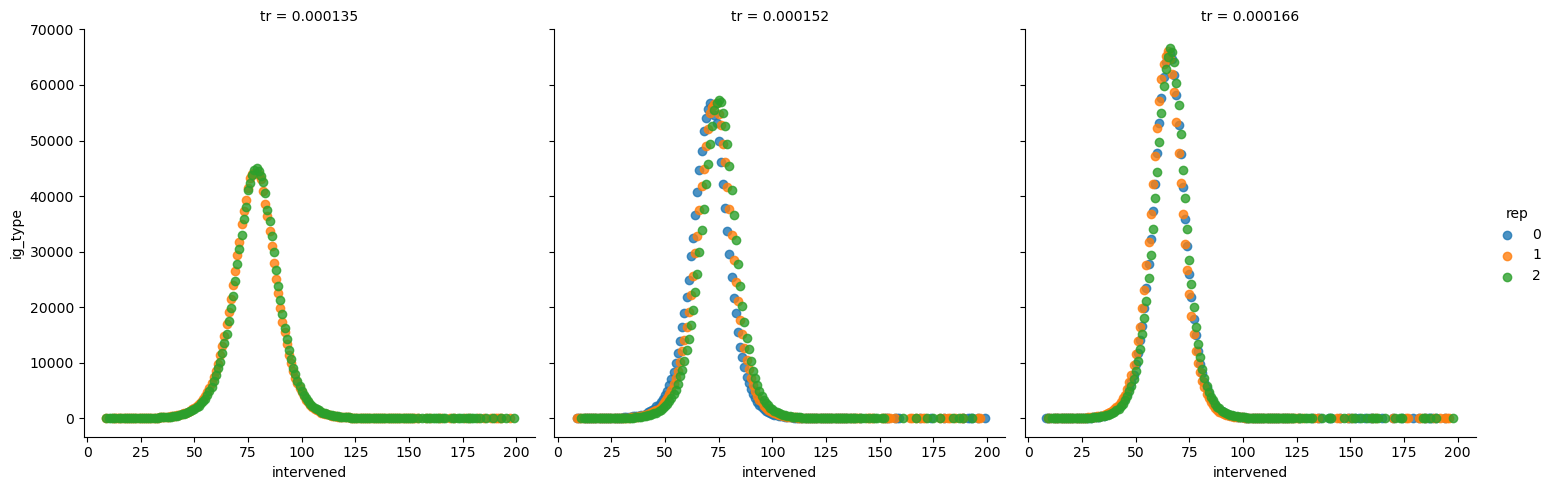

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr', fit_reg=False, data=count_mean.reset_index())

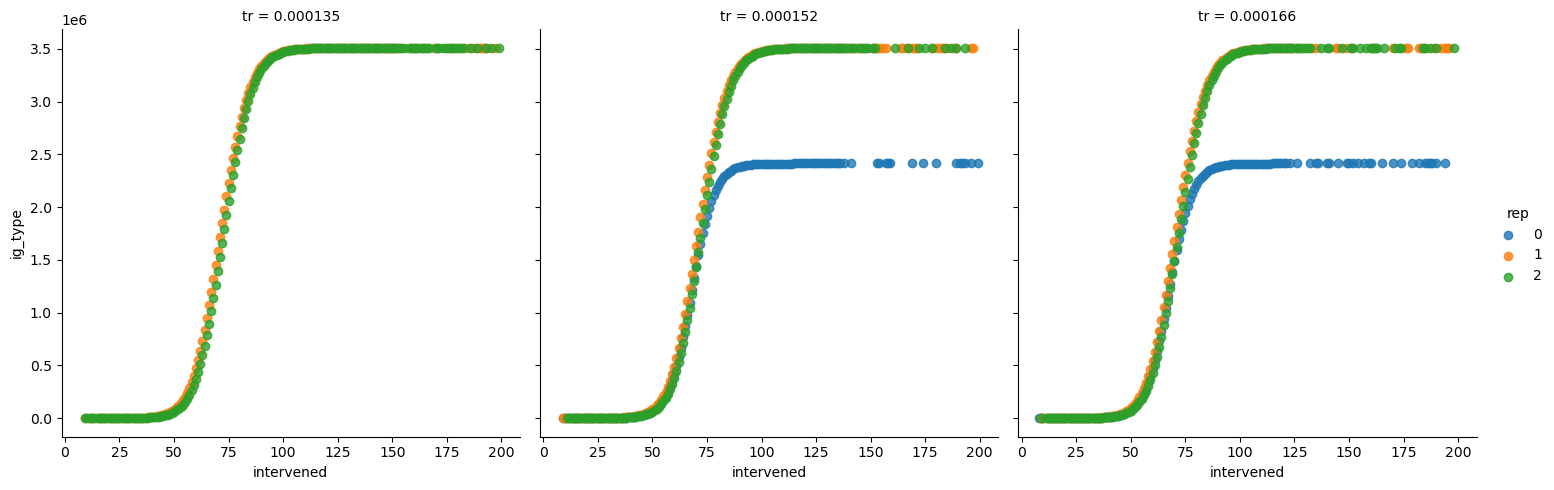

In [255]:
cumulative_count = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count().groupby(level=['rep']).cumsum().reset_index()
fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr', fit_reg=False, data=cumulative_count)

In [256]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2023, 8, 25, 18, 49, 31, 638852)

In [257]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)

diff = t1 - t2
diff

datetime.timedelta(days=19594, seconds=67771, microseconds=666377)

In [258]:
type(diff)

datetime.timedelta

In [259]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0


In [260]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [261]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola['date_dt'] = pd.to_datetime(ebola['Date'], format='%m/%d/%Y')
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [262]:
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates=[0])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [263]:
d = pd.to_datetime('2016-02-29')
d

Timestamp('2016-02-29 00:00:00')

In [264]:
type(d)

pandas._libs.tslibs.timestamps.Timestamp

In [265]:
d.year

2016

In [266]:
d.month

2

In [267]:
d.day

29

In [268]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola[['Date', 'date_dt']].head()

,Date,date_dt
0,2015-01-05,2015-01-05
1,2015-01-04,2015-01-04
2,2015-01-03,2015-01-03
3,2015-01-02,2015-01-02
4,2014-12-31,2014-12-31


In [269]:
ebola['year'] = ebola['date_dt'].dt.year
ebola[['Date', 'date_dt', 'year']].head()

,Date,date_dt,year
0,2015-01-05,2015-01-05,2015
1,2015-01-04,2015-01-04,2015
2,2015-01-03,2015-01-03,2015
3,2015-01-02,2015-01-02,2015
4,2014-12-31,2014-12-31,2014


In [270]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
ebola[['Date', 'date_dt', 'year', 'month', 'day']].head()

,Date,date_dt,year,month,day
0,2015-01-05,2015-01-05,2015,1,5
1,2015-01-04,2015-01-04,2015,1,4
2,2015-01-03,2015-01-03,2015,1,3
3,2015-01-02,2015-01-02,2015,1,2
4,2014-12-31,2014-12-31,2014,12,31


In [271]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [272]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [273]:
ebola['date_dt'].min()

Timestamp('2014-03-22 00:00:00')

In [274]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
ebola[['Date', 'Day', 'outbreak_d']].head()

,Date,Day,outbreak_d
0,2015-01-05,289,289 days
1,2015-01-04,288,288 days
2,2015-01-03,287,287 days
3,2015-01-02,286,286 days
4,2014-12-31,284,284 days


In [275]:
ebola[['Date', 'Day', 'outbreak_d']].tail()

,Date,Day,outbreak_d
117,2014-03-27,5,5 days
118,2014-03-26,4,4 days
119,2014-03-25,3,3 days
120,2014-03-24,2,2 days
121,2014-03-22,0,0 days


In [276]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

In [277]:
banks = pd.read_csv('../data/banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [278]:
banks = pd.read_csv('../data/banklist.csv', parse_dates=[5, 6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


In [279]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
closing_year = banks.groupby(['closing_year']).size()
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()

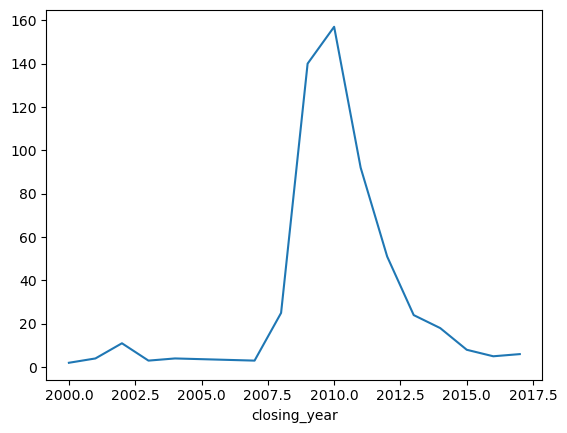

In [280]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax = closing_year.plot()

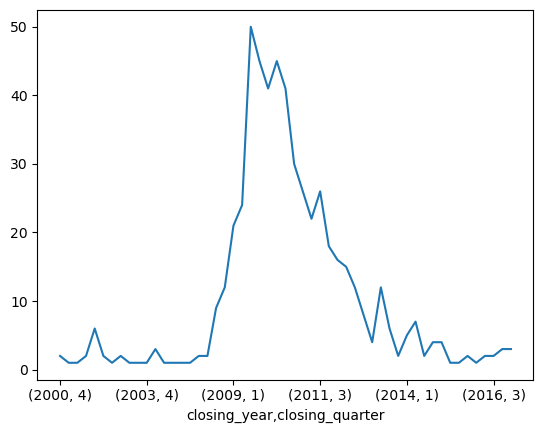

In [281]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()

In [282]:
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates=[0])
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [283]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [284]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [285]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex = head_range
ebola_5.iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


In [286]:
pd.date_range('2017-01-01', '2017-01-07', freq='B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')

In [287]:
pd.date_range('2017-01-01', '2017-01-07', freq='2B')

DatetimeIndex(['2017-01-02', '2017-01-04', '2017-01-06'], dtype='datetime64[ns]', freq='2B')

In [288]:
pd.date_range('2017-01-01', '2017-01-07', freq='WOM-1THU')

DatetimeIndex(['2017-01-05'], dtype='datetime64[ns]', freq='WOM-1THU')

In [289]:
pd.date_range('2017-01-01', '2017-01-07', freq='WOM-3FRI')

DatetimeIndex([], dtype='datetime64[ns]', freq='WOM-3FRI')

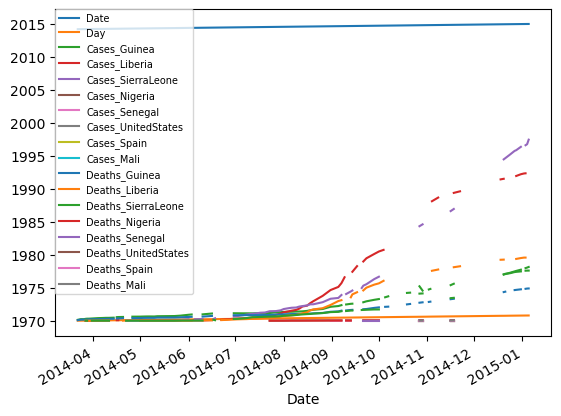

In [290]:
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)

In [291]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
ebola_sub.tail(10)

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2014-04-04,13,143.0,18.0
2014-04-01,10,127.0,8.0
2014-03-31,9,122.0,8.0
2014-03-29,7,112.0,7.0
2014-03-28,6,112.0,3.0
2014-03-27,5,103.0,8.0
2014-03-26,4,86.0,NaN
2014-03-25,3,86.0,NaN
2014-03-24,2,86.0,NaN


In [292]:
ebola = pd.read_csv('../data/country_timeseries.csv', index_col='Date', parse_dates=[0])
ebola.head().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,286,NaN,8157.0,NaN
2014-12-31,284,2730.0,8115.0,9633.0


In [293]:
ebola.tail().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2014-03-27,5,103.0,8.0,6.0
2014-03-26,4,86.0,NaN,NaN
2014-03-25,3,86.0,NaN,NaN
2014-03-24,2,86.0,NaN,NaN
2014-03-22,0,49.0,NaN,NaN


In [294]:
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [295]:
new_idx = reversed(new_idx)
ebola.reindex(new_idx)
ebola.head().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,286,NaN,8157.0,NaN
2014-12-31,284,2730.0,8115.0,9633.0


In [296]:
ebola.tail().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2014-03-27,5,103.0,8.0,6.0
2014-03-26,4,86.0,NaN,NaN
2014-03-25,3,86.0,NaN,NaN
2014-03-24,2,86.0,NaN,NaN
2014-03-22,0,49.0,NaN,NaN


In [297]:
last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [298]:
earliest_date = ebola.index.min()
earliest_date

Timestamp('2014-03-22 00:00:00')

In [299]:
shift_values = last_valid - earliest_date
shift_values

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [300]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted
ebola_shift = pd.DataFrame(ebola_dict)
ebola_shift = ebola_shift[ebola.columns]
ebola_shift.tail()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-27,5,103.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,66.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,60.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-24,2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,0,49.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [301]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Day'], axis=1)
ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
5,103.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,66.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
4,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
3,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,60.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
0,49.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [302]:
down = ebola.resample('M').mean()
down.iloc[:5, :5]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria
Date,,,,,
2014-03-31,4.500000,94.500000,6.500000,3.333333,NaN
2014-04-30,24.333333,177.818182,24.555556,2.200000,NaN
2014-05-31,51.888889,248.777778,12.555556,7.333333,NaN
2014-06-30,84.636364,373.428571,35.500000,125.571429,NaN
2014-07-31,115.700000,423.000000,212.300000,420.500000,1.333333


In [303]:
up = ebola.resample('D').mean()
up.iloc[:5, :5]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria
Date,,,,,
2014-03-22,0.0,49.0,NaN,NaN,NaN
2014-03-23,NaN,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,NaN,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN,NaN
2014-03-26,4.0,86.0,NaN,NaN,NaN


In [304]:
import pytz


len(pytz.all_timezones)

596

In [305]:
import re


regex = re.compile(r'^US')
selected_files = filter(regex.search, pytz.common_timezones)
list(selected_files)

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific']

In [306]:
depart = pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')
depart

Timestamp('2017-08-29 07:00:00-0400', tz='US/Eastern')

In [307]:
arrive = pd.Timestamp('2017-08-29 09:57')
arrive

Timestamp('2017-08-29 09:57:00')

In [308]:
arrive = arrive.tz_localize('US/Pacific')
arrive

Timestamp('2017-08-29 09:57:00-0700', tz='US/Pacific')

In [309]:
arrive.tz_convert('US/Eastern')

Timestamp('2017-08-29 12:57:00-0400', tz='US/Eastern')

In [310]:
duration = arrive.tz_convert('US/Eastern') - depart
duration

Timedelta('0 days 05:57:00')